# Creating Histograms of Well Log Data
The accompanying video for this notebook can be found on my YouTube channel at:  https://youtu.be/C5USshonqE4
Please check it out, like and subscribe.

## Introduction

Histograms are a great way to explore the distribution of data. They are a commonly used tool within petrophysics for understanding the spread and distribution of data, and for picking key interpretation parameters such as shale or clay volume minimum and maximum values.

In this short tutorial we will see how to display histograms from one of the Volve Wells.

## Importing Libraries and Loading LAS Data
The first stage of any python project or notebook is generally to import the required libraries. In this case we are going to be using `lasio` to load our las file, `pandas` for storing our well log data, and `matplotlib` for visualising our data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import lasio

The data we are using for this short tutorial comes from the publicly released Equinor Volve dataset. Details of which can be found [here](https://www.equinor.com/en/what-we-do/digitalisation-in-our-dna/volve-field-data-village-download.html)

To read the data we will use the lasio library which we explored in the previous notebook and [video](https://youtu.be/8U4gxMJybJs).

In [2]:
las = lasio.read("15-9-19_SR_COMP.LAS")

We then convert the las file to a pandas dataframe object.

In [3]:
df = las.df()

In [4]:
df.head()

,AC,CALI,DEN,GR,NEU,RDEP,RMED
DEPT,,,,,,,
3615.4340,95.7952,12.7249,2.3429,54.8754,44.5742,0.8941,0.8359
3615.5864,94.2267,12.5961,2.3528,53.5158,62.1103,0.7367,0.8028
3615.7388,101.3254,13.7632,2.3170,48.9803,71.9087,0.6423,0.7958
3615.8912,99.5672,14.3249,2.2585,36.6762,44.8988,0.6571,0.7929
3616.0436,100.5965,11.1429,2.2108,40.4632,49.5744,0.7442,0.7940


Using the `.describe()` method we can explore the summary statistics of the data.

In [5]:
df.describe()

,AC,CALI,DEN,GR,NEU,RDEP,RMED
count,6579.000000,6579.000000,6656.000000,6689.000000,6668.000000,6701.000000,6701.000000
mean,78.313607,9.550656,2.459291,36.048563,17.986061,3.221012,3.081261
std,17.009535,0.906267,0.162682,26.705519,11.694084,8.860387,6.306741
min,1.025100,6.000000,2.037700,2.766100,2.178300,0.250300,0.294700
25%,66.169300,9.142900,2.341250,14.852300,10.244475,0.800600,0.844800
50%,74.145900,9.523800,2.514200,32.142600,15.245100,1.770000,1.801400
75%,89.024250,9.904800,2.589800,50.901700,22.952525,3.394000,3.537300
max,149.218700,20.285700,3.001300,304.333700,146.347400,198.537100,115.635000


## Creating Histograms Using pandas

We can create a quick histogram using pandas without relying on importing other libraries.

<Axes: ylabel='Frequency'>

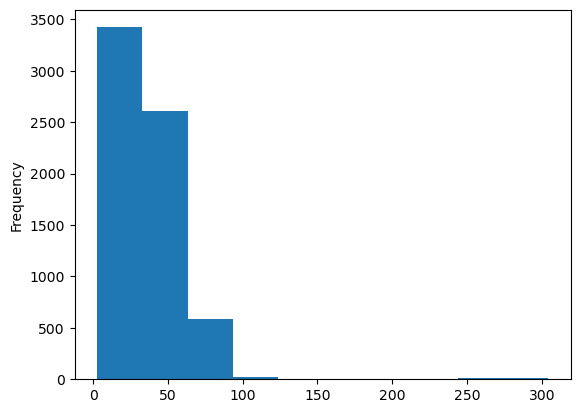

In [8]:
df['GR'].plot(kind='hist')


## Creating Histograms Using matplotlib
We can also create the same histogram using matplotlib like so.

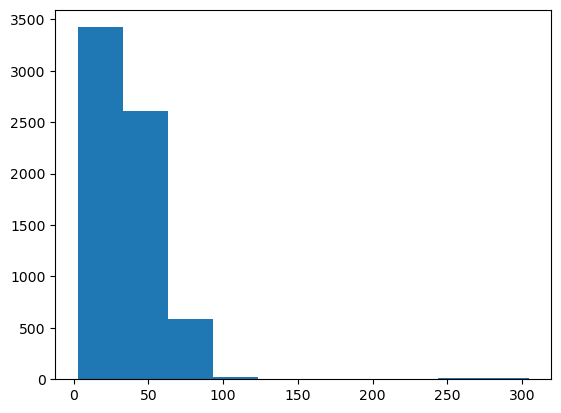

In [9]:
plt.hist(df['GR'])
plt.show()

This generates a very minimal plot. We can see that the values range from around 0 to 150, with a very small piece of data at 250 API. Each bin is around 25 API wide, which is quite a large range.

We can control this by specifying a set number for the bins argument, in this example we will set it to 30.

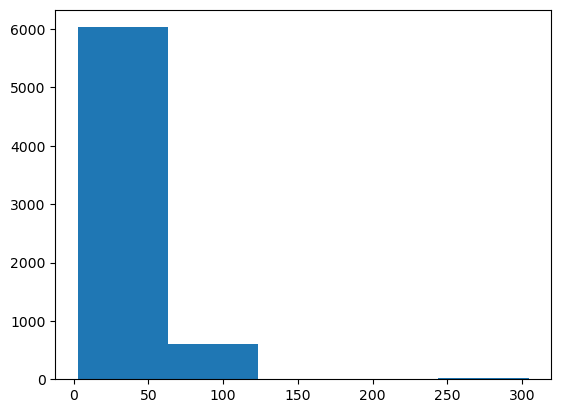

In [10]:
## note that not all bens appear because it represents a small value 
plt.hist(df['GR'],bins=5)
plt.show()

Let's tidy the plot up a little by adding edge colours to the bins.

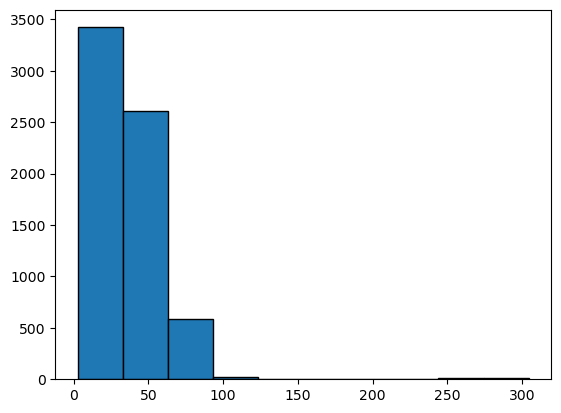

In [11]:
plt.hist(df['GR'], bins=10, edgecolor='black')
plt.show()

When we do this, we can see that the bins just below 100 API, is in fact two separate bins. 

To tidy the plot up further, we can assign both an x and y label, and also set the x-axis limits.

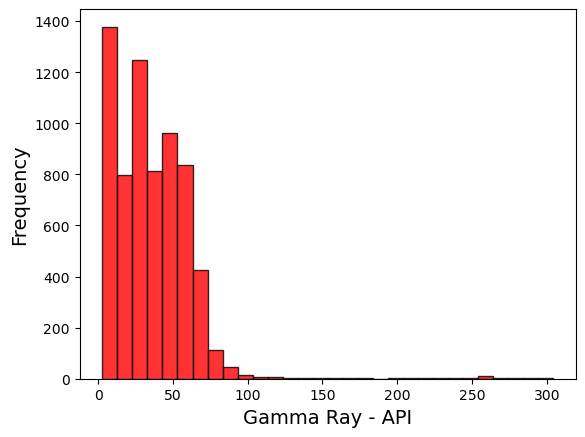

In [14]:
plt.hist(df['GR'], bins=30, color='red', alpha=0.8, edgecolor='black')
plt.xlabel('Gamma Ray - API', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
#x=range(0,100,10)
plt.xlim()

plt.savefig('histogram.png', dpi=300)

plt.show()

In addition to the bars, we can also add in a kernel density estimation, which provides us with a line illustrating the distribution of the data.

(0.0, 200.0)

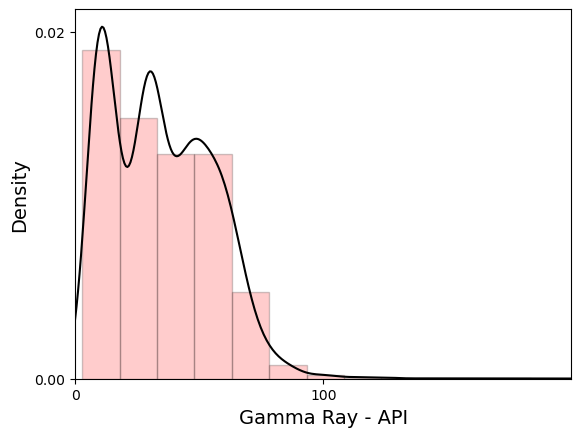

In [21]:
df['GR'].plot(kind='hist', bins=20, color='r', alpha=0.2, density=True, edgecolor='black')
df['GR'].plot(kind='kde', color='black')
plt.xlabel('Gamma Ray - API', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.xticks([0,100])
plt.yticks([0,0.02])

plt.xlim(0,200)

When calculating clay and shale volumes we often use the percentiles as our interpretation parameters. 

These can be calculated using built in pandas functions: `mean()` and `quantile()`.

In [23]:
mean = df['GR'].mean()
p5 = df['GR'].quantile(0.05)
p95 = df['GR'].quantile(0.95)

print(f'Mean: \t {mean}')
print(f'P05: \t {p5}')
print(f'P95: \t {p95}')


Mean: 	 36.048562595305725
P05: 	 7.1663
P95: 	 69.23461999999995


To get an idea of where these points fall in relation to our data, we can add them onto the plot using axvline and passing in the calculated variables, a colour and a label.

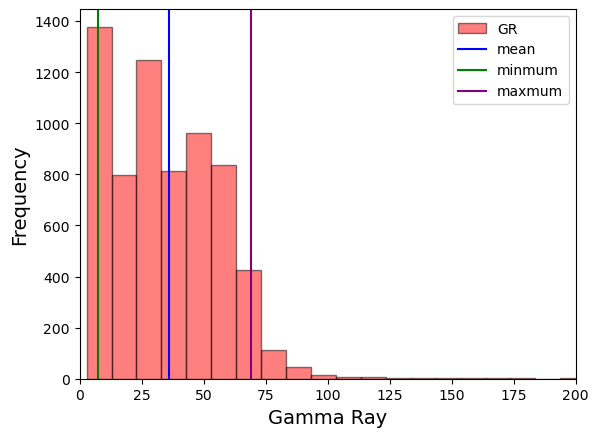

In [25]:
df['GR'].plot(kind='hist', bins=30, color='red', alpha=0.5, edgecolor='black')
plt.xlabel('Gamma Ray', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xlim(0,200)

plt.axvline(mean, color='blue', label='mean')
plt.axvline(p5, color='green', label='minmum')
plt.axvline(p95, color='purple', label='maxmum')

plt.legend()
plt.show()


# Summary

In this short tutorial we have covered the basics of how to display a well log curve as a histogram and customise to provide a plot that is suitable for including in reports and publications.

---

*Thanks for reading!*

*If you have found this article useful, please feel free to check out my other articles looking at various aspects of Python and well log data. You can also find my code used in this article and others at [GitHub](https://github.com/andymcdgeo).*

*If you want to get in touch you can find me on [LinkedIn](https://www.linkedin.com/in/andymcdonaldgeo/) or at my [website](http://andymcdonald.scot/).*

*Interested in learning more about python and well log data or petrophysics? Follow me on [Medium](https://medium.com/@andymcdonaldgeo).*

*If you have enjoyed this notebook, video or article or any others and want to show your appreciation you are welcome to [Buy Me a Coffee](https://www.buymeacoffee.com/andymcdonaldgeo)*